# Building a brain object

Brain objects are supereeg's fundamental data structure for a single subject's iEEG data.  To create one at minimum you'll need a matrix of neural recordings (time samples by electrodes), electrode locations, and a sample rate. Additionally, you can include information about separate recording sessions and store custom meta data. In this tutorial, we'll build a brain object from scratch and get familiar with some of the methods.

# Load in the required libraries

In [19]:
import supereeg as se
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate some data

First, we'll use supereeg's built in simulation functions to simulate some data and electrodes. By default, the `simualate_data` function will return a 1000 samples by 10 electrodes matrix, but you can specify the number of time samples with `n_samples` and the number of electrodes with `n_elecs`. If you want further information on simulating data, check out the simulate tutorial!

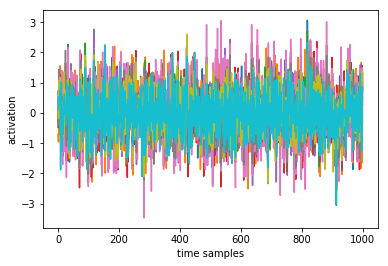

In [20]:
# simulate some data
data = se.simulate_bo(n_samples=1000, sessions=2, n_elecs=10).get_data()

# plot it
plt.plot(data)
plt.xlabel('time samples')
plt.ylabel('activation')
plt.show()

We'll also simulate some electrode locations

In [21]:
locs = se.simulate_locations()
print(locs)

    x   y   z
0  24  41 -31
1 -15   3  28
2  49   0 -44
3  26 -38 -32
4  12 -10   6
5  26  35  46
6  14  48  -9
7 -42  -7  49
8  34 -39  35
9 -16 -11 -39


# Creating a brain object

To construct a new brain objects, simply pass the data and locations to the `Brain` class like this:

In [22]:
bo = se.Brain(data=data, locs=locs, sample_rate=100)

To view a summary of the contents of the brain object, you can call the `info` function:

In [23]:
bo.info()

Number of electrodes: 10
Recording time in seconds: [ 10.]
Number of sessions: 1
Date created: Wed Feb  7 11:35:28 2018
Meta data: {}


Optionally, you can pass a `sessions` parameter, which is can be a numpy array or list the length of your data with a unique identifier for each session.  For example:

In [24]:
sessions = np.array([1]*(data.shape[0]/2)+[2]*(data.shape[0]/2))
bo = se.Brain(data=data, locs=locs, sample_rate=1000, sessions=sessions)
bo.info()

Number of electrodes: 10
Recording time in seconds: [ 0.5  0.5]
Number of sessions: 2
Date created: Wed Feb  7 11:35:30 2018
Meta data: {}


You can also pass add custom meta data to the brain object to help keep track of its contents. `meta` is a dictionary comprised of whatever you want:

In [25]:
meta = {
    'subjectID' : '123',
    'Investigator' : 'Andy',
    'Hospital' : 'DHMC'
}
bo = se.Brain(data=data, locs=locs, sample_rate=1000, sessions=sessions, meta=meta)
bo.info()

Number of electrodes: 10
Recording time in seconds: [ 0.5  0.5]
Number of sessions: 2
Date created: Wed Feb  7 11:35:32 2018
Meta data: {'Hospital': 'DHMC', 'subjectID': '123', 'Investigator': 'Andy'}


# The structure of a brain object

Inside the brain object, the iEEG data is stored as a Pandas DataFrame that can be accessed directly:

In [26]:
bo.data.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.459450,-0.706842,0.058695,0.726168,0.385601,-0.473558,0.282071,0.343180,0.470775,0.105116
1,-0.290118,-0.957247,-0.241997,-0.378947,-0.256516,-0.457286,0.491783,-0.403728,-0.186000,0.500350
2,0.516956,0.270683,0.778460,0.237711,-0.263555,0.107381,0.045014,0.444385,0.660307,0.349654
3,0.129541,0.229562,0.972795,1.199929,1.406894,0.375776,1.198393,1.438626,1.081199,0.540056
4,0.282568,0.032007,0.315121,-0.276685,0.424555,0.548960,0.511330,0.420461,0.119937,0.298206


or returned as a numpy array using the `get_data` method:

In [27]:
bo.get_data()

array([[-0.45945   , -0.70684235,  0.05869499, ...,  0.34317993,
         0.47077518,  0.10511571],
       [-0.29011796, -0.95724669, -0.24199651, ..., -0.40372808,
        -0.18599992,  0.50035045],
       [ 0.51695626,  0.27068317,  0.77846045, ...,  0.44438513,
         0.66030703,  0.34965448],
       ..., 
       [-1.36576528, -1.64280896, -0.97875758, ...,  0.02965258,
        -0.43095833, -1.2551755 ],
       [ 0.37078657,  1.39299864,  0.33933079, ...,  1.39377107,
         1.39000103,  0.87119894],
       [ 0.28998455, -0.36500422,  0.46941223, ...,  1.28938068,
         0.705919  ,  0.73874273]])

Similarly, the electrode locations are stored as a Pandas DataFrame, and can be retrieved as a numpy array using the `get_locs` method:

In [28]:
bo.locs.head()

,x,y,z
0,24,41,-31
1,-15,3,28
2,49,0,-44
3,26,-38,-32
4,12,-10,6


In [29]:
bo.get_locs()

array([[ 24,  41, -31],
       [-15,   3,  28],
       [ 49,   0, -44],
       [ 26, -38, -32],
       [ 12, -10,   6],
       [ 26,  35,  46],
       [ 14,  48,  -9],
       [-42,  -7,  49],
       [ 34, -39,  35],
       [-16, -11, -39]])

You can also pass a list of indices for either `times` or `locs` and return a subset of the brain object

In [30]:
bo_s = bo.get_slice(times=[1,2,3], locs=[1,2,3])
bo_s.get_data()

TypeError: get_slice() got an unexpected keyword argument 'locs'

You can also plot both the data and the electrode locations:

/Users/lucyowen/repos/superEEG/supereeg/brain.py:290: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax.set_axis_bgcolor('w')


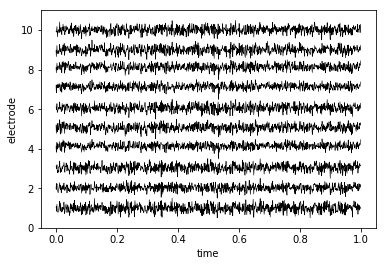

In [14]:
bo.plot_data()
plt.show()

In [ ]:
bo.plot_locs()

The other pieces of the brain object are listed below:

In [ ]:
# array of session identifiers for each timepoint
sessions = bo.sessions

# number of sessions
n_sessions = bo.n_sessions

# sample rate
sample_rate = bo.sample_rate

# number of electrodes
n_elecs = bo.n_elecs

# length of each recording session in seconds
n_seconds = bo.n_secs

# the date and time that the bo was created
date_created = bo.date_created

# kurtosis of each electrode
kurtosis = bo.kurtosis

# meta data
meta = bo.meta

# label delinieating observed and reconstructed locations
label = bo.label

# Brain object methods

There are a few other useful methods on a brain object

## `bo.info()`

This method will give you a summary of the brain object:

In [ ]:
bo.info()

## `bo.get_data()`

In [ ]:
data_array = bo.get_data()

## `bo.get_zscore_data()`

This method will return a numpy array of the zscored data:

In [ ]:
zdata_array = bo.get_zscore_data()

## `bo.get_locs()`

This method will return a numpy array of the electrode locations:

In [ ]:
locs = bo.get_locs()

## `bo.plot_data()`

This method normalizes and plots data from brain object:

In [ ]:
bo.plot_data()

## `bo.plot_locs()`
This method plots electrode locations from brain object:

In [ ]:
bo.plot_locs()

## `bo.save(fname='something')`

This method will save the brain object to the specified file location.
The data will be saved as a 'bo' file, which is a dictionary containing the elements of a brain object saved in the hd5 format using `deepdish`.

In [ ]:
#bo.save(fname='brain_object')

## `bo.to_nii()`

This method converts the brain object into a `nibabel` nifti image.  If `filepath` is specified, the nifti file will be saved. You can also specify a nifti template with the `template` argument.

In [ ]:
nii = bo.to_nii()
print(type(nii))

# save the file
# nii = bo.to_nii(filepath='/path/to/file/brain')

# specify a template
# nii = bo.to_nii(template='/path/to/nifti/file.nii')